# **Anggota Kelompok**
1. Amelia Martha
2. Khairul Kanters
3. M. Haikal Abdussalam

# **I. Teori**

K Means

Membagi data menjadi beberapa kelompok


#**II. Program**

In [0]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import random

In [19]:
#upload data
from google.colab import files
dataRaw = files.upload()

Saving kc_house_data.csv to kc_house_data (2).csv


In [20]:
data_df = pd.read_csv("kc_house_data.csv")
data_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0


In [21]:
# Memilih data yang akan di cluster
titik_a = "lat"
titik_b = "long"
dataset = data_df[[titik_a,titik_b]]
X = dataset
dataset.head()

,lat,long
0,47.5112,-122.257
1,47.7210,-122.319
2,47.7379,-122.233
3,47.5208,-122.393
4,47.6168,-122.045


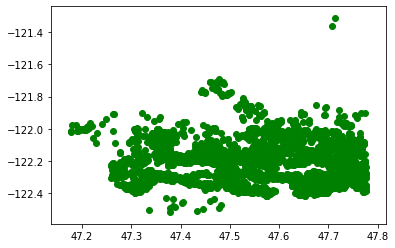

In [22]:
plt.scatter(dataset[titik_a],dataset[titik_b],c='green')
plt.show()

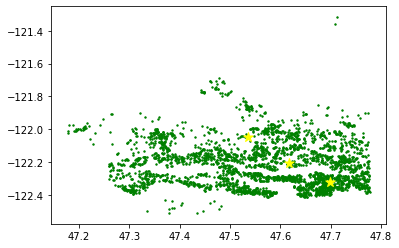

In [23]:
# Fungsi menghitung nilai K random
def RandomCentroid(X):
  return X.sample(n=K)

# Membangkitkan nilai random untuk centroids awal
K=3
Centroids = RandomCentroid(X)

# Plot nilai random untuk centroids awal
plt.scatter(X[titik_a],X[titik_b],c='green', s=2)
plt.scatter(Centroids[titik_a],Centroids[titik_b],c='yellow',marker="*",s=100)
plt.show()

In [0]:
# Fungsi menghitung jarak
def EuclidianDistance(row_a, row_b):
  d1=(row_a[titik_a]-row_b[titik_a])**2
  d2=(row_a[titik_b]-row_b[titik_b])**2
  d=np.sqrt(d1+d2)
  return d

# Fungsi mencari nilai centroids baru
def PointClustering(pos,i,K,row,min_dist):
  for i in range(K):
    if row[i+1] < min_dist:
      min_dist = row[i+1]
      pos=i+1
  return pos  

# Fungsi menghitung perbedaan centroids
def diffCentroid(Centroids_new,Centroids):
  return (Centroids_new[titik_a] - Centroids[titik_a]).sum() + (Centroids_new[titik_b] - Centroids[titik_b]).sum()

In [27]:
# Fungsi Utama

miss = 1
j = 0

while(miss!=0):
    XD=X
    i=1
    for index1,row_a in Centroids.iterrows():
        ED=[]
        for index2,row_b in XD.iterrows():
            d = EuclidianDistance(row_a,row_b)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        pos = PointClustering(pos,i,K,row,min_dist)
        C.append(pos)
        
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[[titik_a,titik_b]]
    if j == 0:
        miss=1
        j=j+1
    else:
        miss = diffCentroid(Centroids_new,Centroids)
        miss.sum()
    Centroids = X.groupby(["Cluster"]).mean()[[titik_a,titik_b]]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


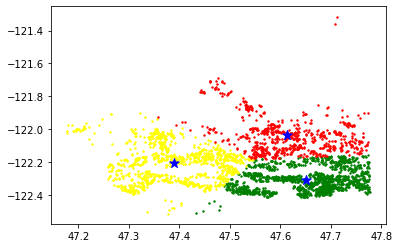

In [28]:
# Plot hasil perhitungan
color=['green','yellow','red']
for k in range(K):
    dataFinalCluster=X[X["Cluster"]==k+1]
    plt.scatter(dataFinalCluster[titik_a],dataFinalCluster[titik_b],c=color[k], s=2)

plt.scatter(Centroids[titik_a],Centroids[titik_b],c='blue',marker="*",s=100)
plt.show()